# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [4]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [7]:
fraud['fraud'].value_counts(normalize=True)

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Define features and target
X = fraud.drop(columns='fraud')
y = fraud['fraud']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

Confusion Matrix:
 [[170350  12207]
 [   849  16594]]


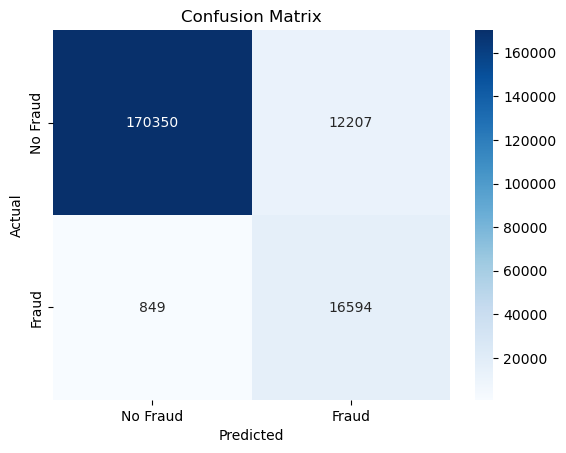

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict with the trained model
y_pred = model.predict(X_test_scaled)

# Get the classification report for evaluation
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# If you want to see the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# For a more detailed look at the confusion matrix with labels
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
# Import necessary libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Define features (X) and target (y)
X = fraud.drop(columns='fraud')  # Assuming 'fraud' is the target column
y = fraud['fraud']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling on the training set
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

# Train the Logistic Regression model with the resampled data
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred_resampled = model.predict(X_test_scaled)

# Print classification report
print("Classification Report after Oversampling:\n", classification_report(y_test, y_pred_resampled))


Classification Report after Oversampling:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Train the logistic regression model again with the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_resampled = model.predict(X_test_scaled)
print("Undersampling - Classification Report:\n", classification_report(y_test, y_pred_resampled))


Undersampling - Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the logistic regression model again with the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_resampled = model.predict(X_test_scaled)
print("SMOTE - Classification Report:\n", classification_report(y_test, y_pred_resampled))


SMOTE - Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

